In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

In [2]:
#Importing Dataset
df = pd.read_csv('multipleChoiceResponses.csv',encoding='latin-1')

C:\Users\shubham\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Obtaining broad specifics about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 228 entries, GenderSelect to JobFactorPublishingOpportunity
dtypes: float64(13), object(215)
memory usage: 29.1+ MB


In [5]:
#Listing out the attributes of the data in sequence
list(df)

['GenderSelect',
 'Country',
 'Age',
 'EmploymentStatus',
 'StudentStatus',
 'LearningDataScience',
 'CodeWriter',
 'CareerSwitcher',
 'CurrentJobTitleSelect',
 'TitleFit',
 'CurrentEmployerType',
 'MLToolNextYearSelect',
 'MLMethodNextYearSelect',
 'LanguageRecommendationSelect',
 'PublicDatasetsSelect',
 'LearningPlatformSelect',
 'LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'Lear

In [6]:
# allow plots to appear in the notebook
%matplotlib inline

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import operator
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

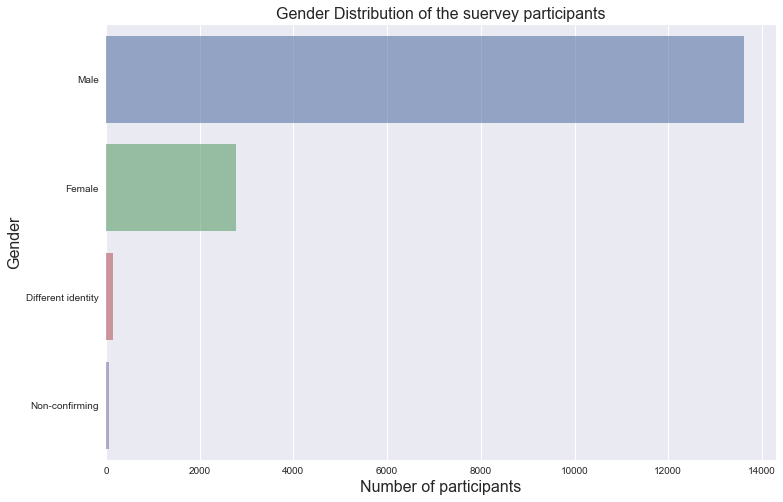

Proportion of women in this survey: 16.71% 
Proportion of men in this survey: 81.88% 


In [8]:
#Plotting Gender Distribution v/s Number of Data Scientists
plt.figure(figsize=(12,8))
genders = df['GenderSelect'].value_counts()
sns.barplot(y=genders.index, x=genders.values, alpha=0.6)
plt.yticks(range(len(df['GenderSelect'].value_counts().index)), ['Male', 'Female','Different identity','Non-confirming'])
plt.title("Gender Distribution of the suervey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Gender", fontsize=16)
plt.show();
print('Proportion of women in this survey: {:0.2f}% '.format(100*len(df[df['GenderSelect']=='Female'])/len(df['GenderSelect'].dropna())))
print('Proportion of men in this survey: {:0.2f}% '.format(100*len(df[df['GenderSelect']=='Male'])/len(df['GenderSelect'].dropna())))

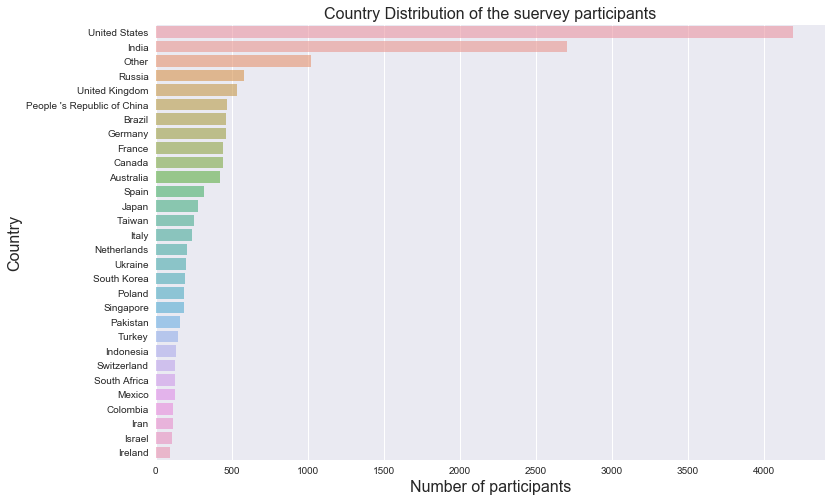

In [9]:
#Country wise disribution of data scientists
plt.figure(figsize=(12,8))
countries = df['Country'].value_counts().head(30)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.title("Country Distribution of the suervey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Country", fontsize=16)
plt.show();

In [10]:
#LearningCatergoryFrequency
tool = df.loc[:, 'LearningCategorySelftTaught':'LearningCategoryOther']

In [11]:
tool.columns

Index(['LearningCategorySelftTaught', 'LearningCategoryOnlineCourses',
       'LearningCategoryWork', 'LearningCategoryUniversity',
       'LearningCategoryKaggle', 'LearningCategoryOther'],
      dtype='object')

In [12]:
tool_cols = ['LearningCategorySelftTaught', 'LearningCategoryOnlineCourses',
       'LearningCategoryWork', 'LearningCategoryUniversity',
       'LearningCategoryKaggle', 'LearningCategoryOther']

In [13]:
tool.columns = tool_cols

In [14]:
tool.head()

,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther
0,0.0,0.0,100.0,0.0,0.0,0.0
1,10.0,30.0,0.0,30.0,30.0,0.0
2,20.0,50.0,0.0,30.0,0.0,0.0
3,30.0,0.0,40.0,30.0,0.0,0.0
4,60.0,5.0,5.0,30.0,0.0,0.0


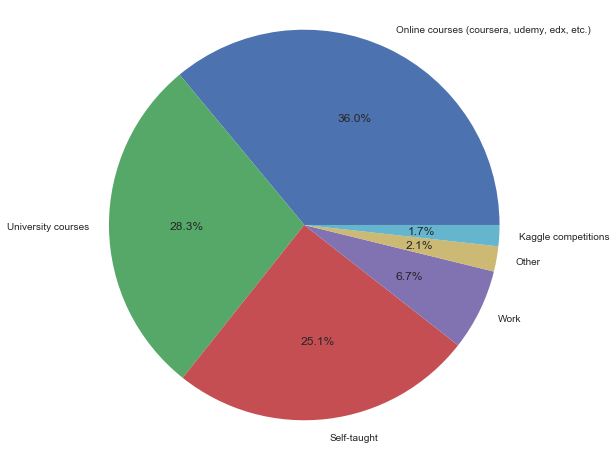

In [15]:
#how did they start learnning data science
plt.figure(figsize=(10,8))
temp=df['FirstTrainingSelect'].value_counts()
labels = temp.index
sizes = temp.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show();

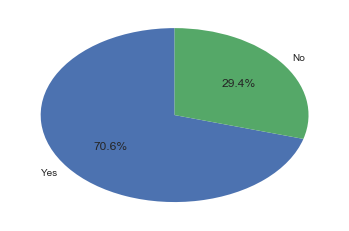

In [16]:
#Data Scientists who did a career switch
import matplotlib.pyplot as plt
switch = df['CareerSwitcher'].value_counts()
labels = (np.array(switch.index))
values = (np.array((switch / switch.sum())*100))
plt.pie(values, labels=labels,startangle=90, autopct='%.1f%%')
plt.show()

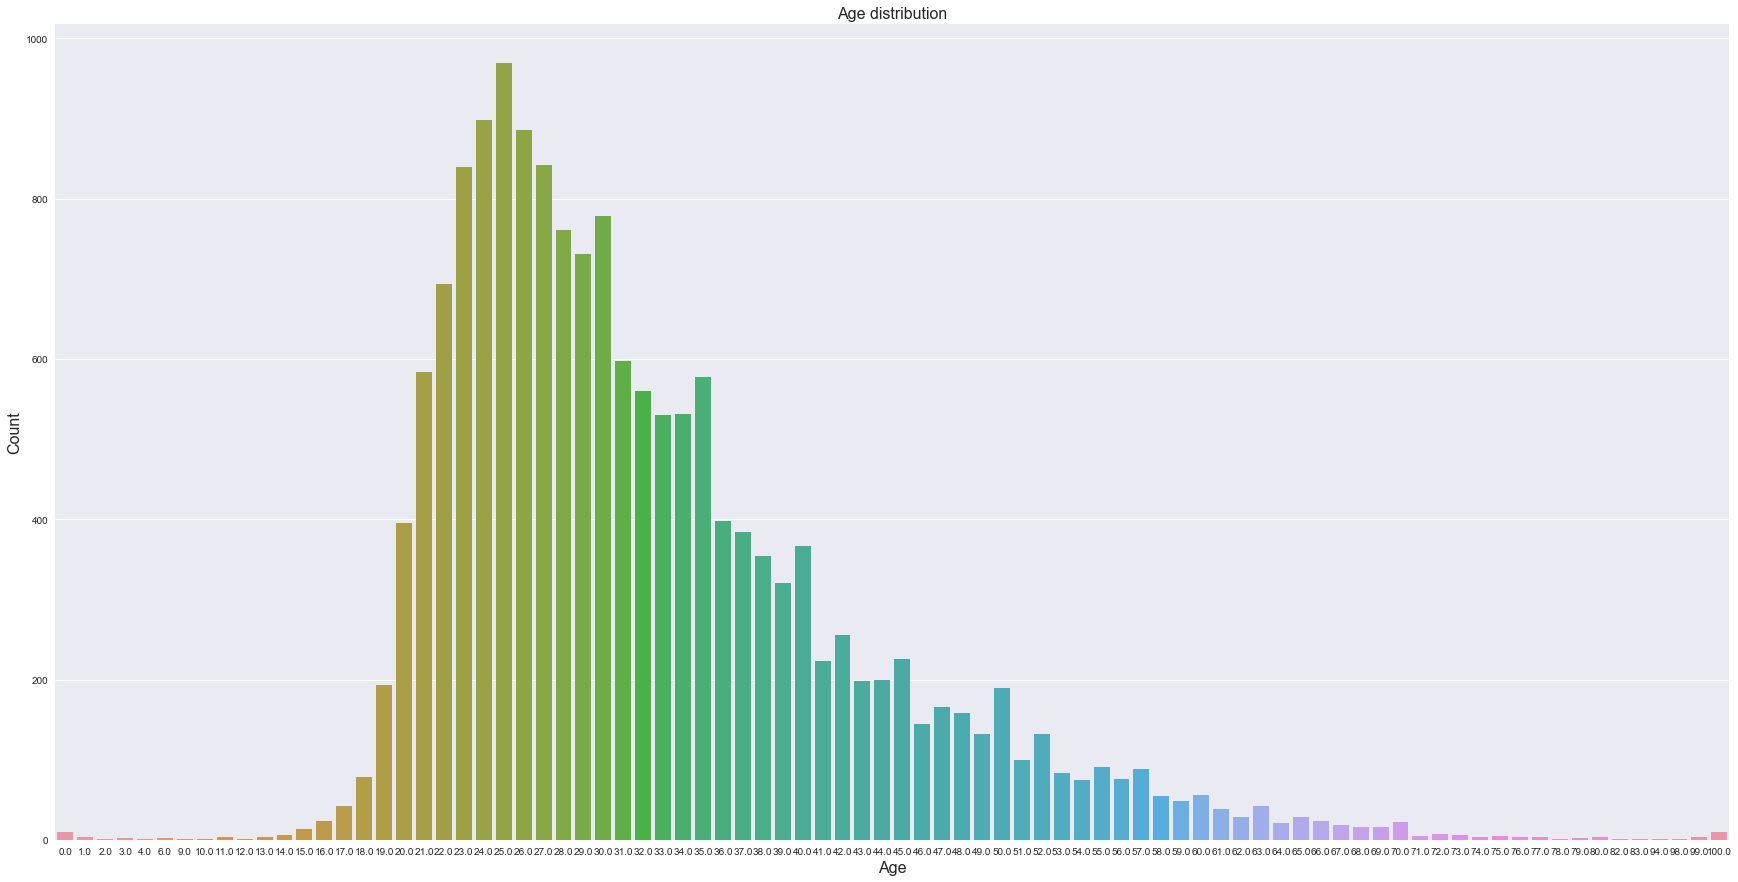

In [17]:
#Age of active Data  Scientists around the world
age = df['Age']
age_count = age.value_counts()
plt.figure(figsize=(30,15))
sns.barplot(x=age_count.index, y=age_count.values)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Age distribution',fontsize=16)
plt.show()

In [18]:
# A handy-dandy function
def check_age(data):
    print("Null values count: ", data.isnull().sum())
    print("Minimum age: ", data.min())
    print("Maximum age: ", data.max())
    print("Average age: ", data.mean())
    print("Median age: ", np.median(data.values))
    print("Mode age: ", sst.mode(data.values))

In [19]:
#Comparing agewise active Data scientists in United States v/s India
age_country = df[['Country', 'Age']]
# Drop the null values
age_country = age_country.dropna()
# Drop values > 60 and < 10
age_country = age_country.drop(age_country.index[(age_country['Age'] > 60) | (age_country['Age'] < 10)]).reset_index(drop=True)

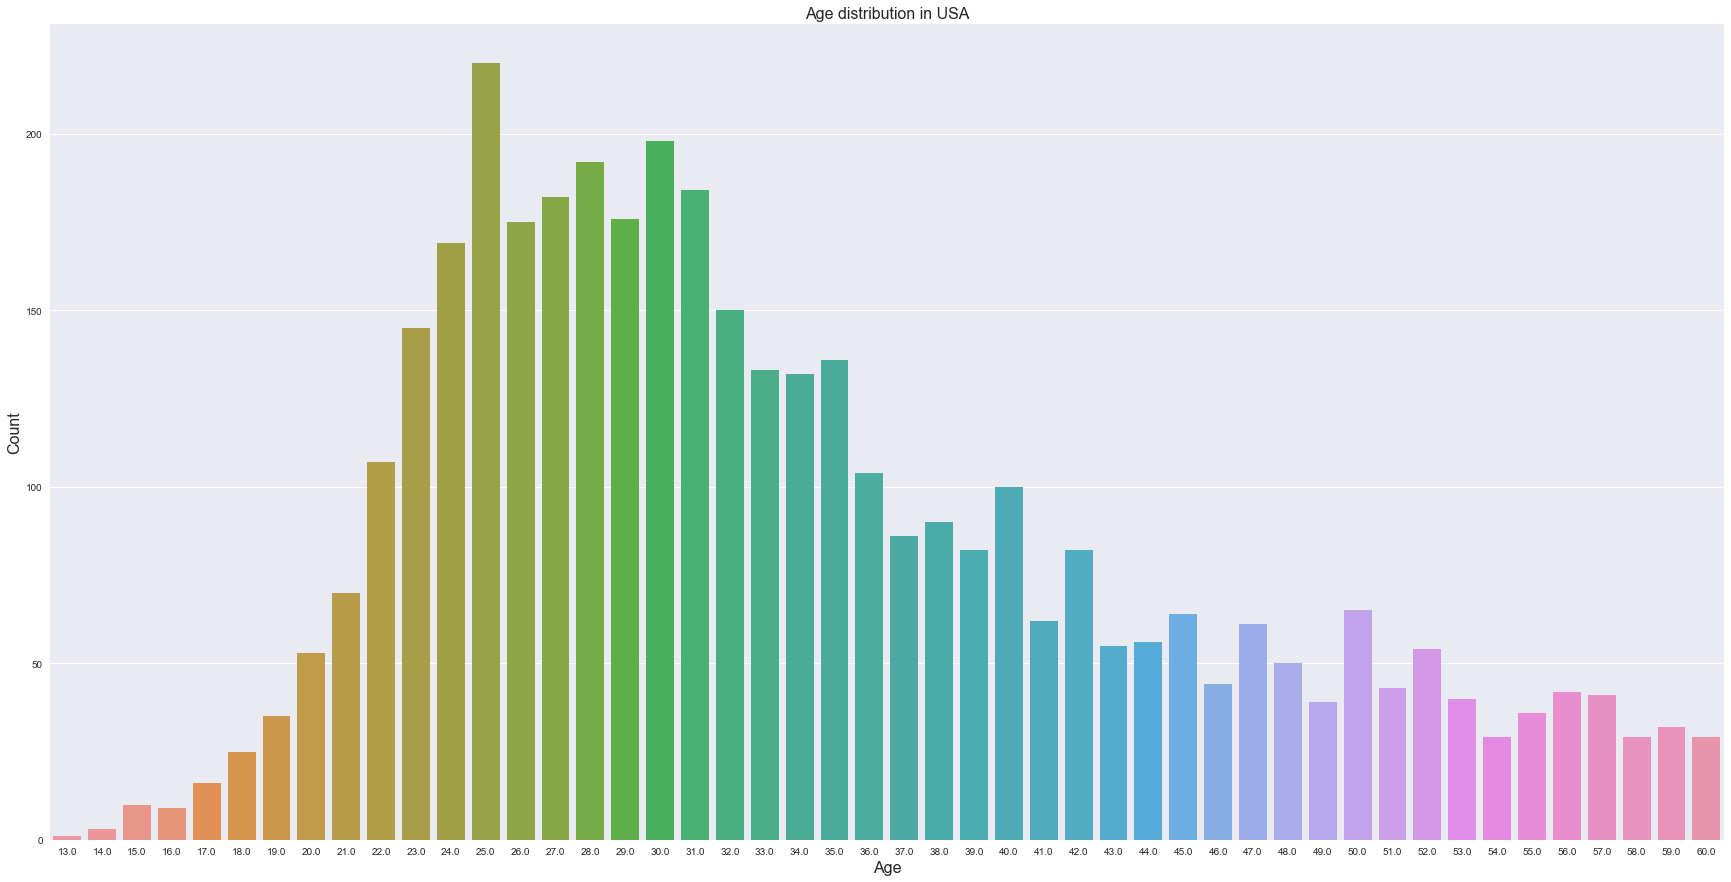

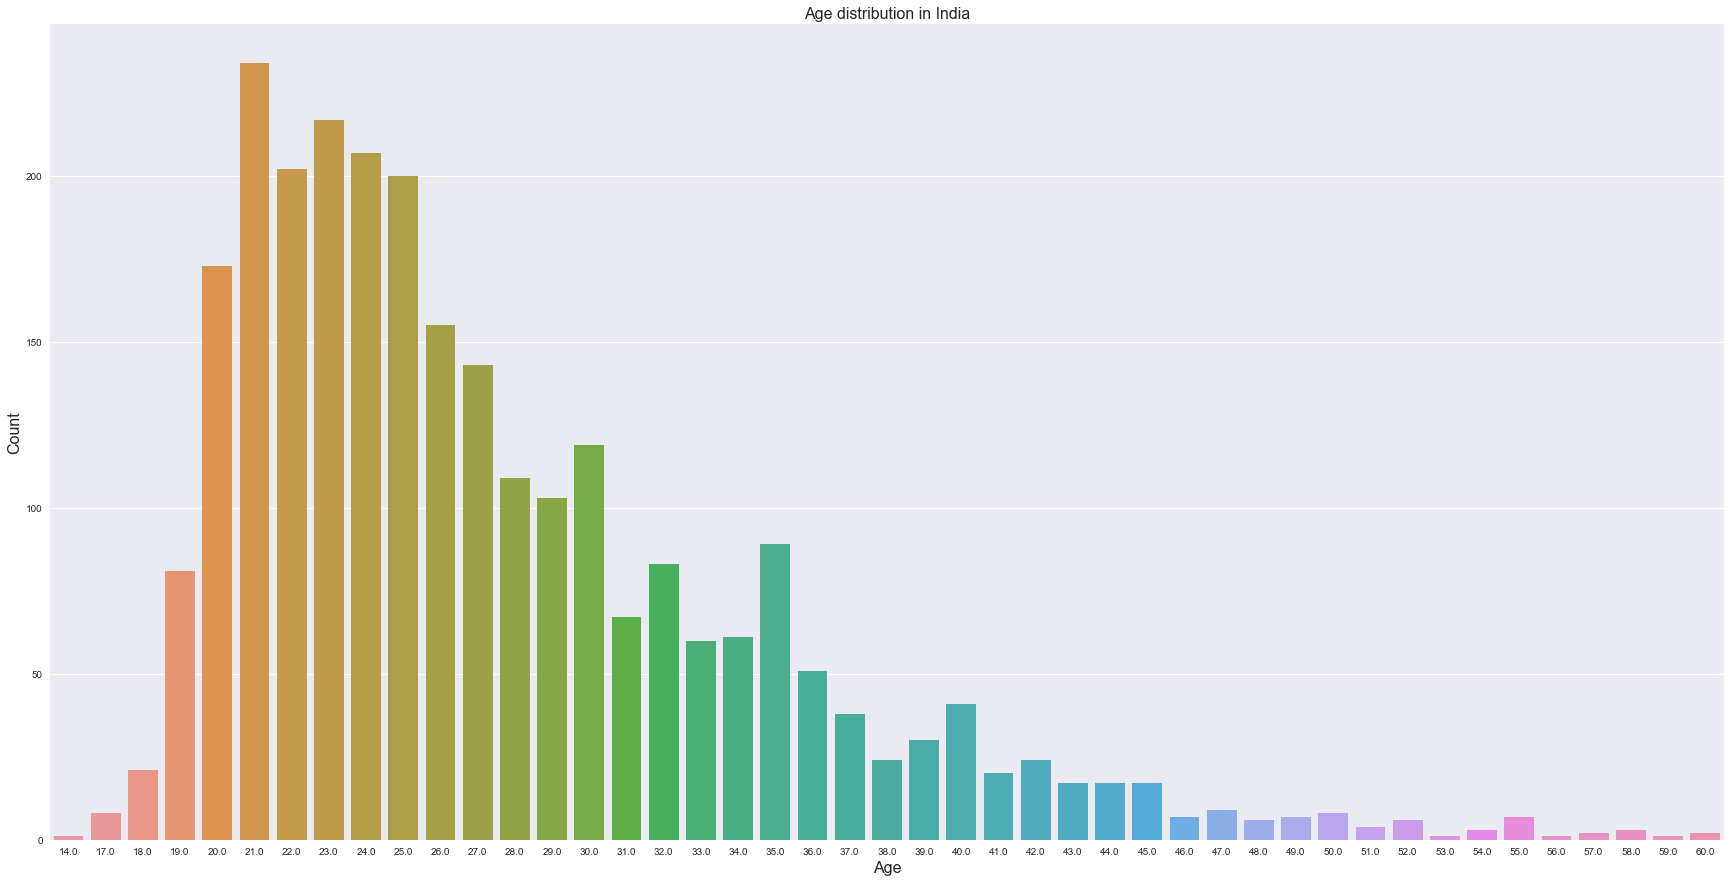

In [20]:
# Get USA and India from the groups
age_USA = age_country.groupby('Country').get_group('United States')
age_India = age_country.groupby('Country').get_group('India')



# Count and plot 
age_count = age_USA.Age.value_counts()
plt.figure(figsize=(30,15))
sns.barplot(x=age_count.index, y=age_count.values)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Age distribution in USA',fontsize=16)
plt.show()


age_count = age_India.Age.value_counts()
plt.figure(figsize=(30,15))
sns.barplot(x=age_count.index, y=age_count.values)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Age distribution in India',fontsize=16)
plt.show()

In [21]:
#Getting numerics from emolyment status
df['EmploymentStatus'].value_counts()

Employed full-time                                      10897
Not employed, but looking for work                       2110
Independent contractor, freelancer, or self-employed     1330
Not employed, and not looking for work                    924
Employed part-time                                        917
I prefer not to say                                       420
Retired                                                   118
Name: EmploymentStatus, dtype: int64

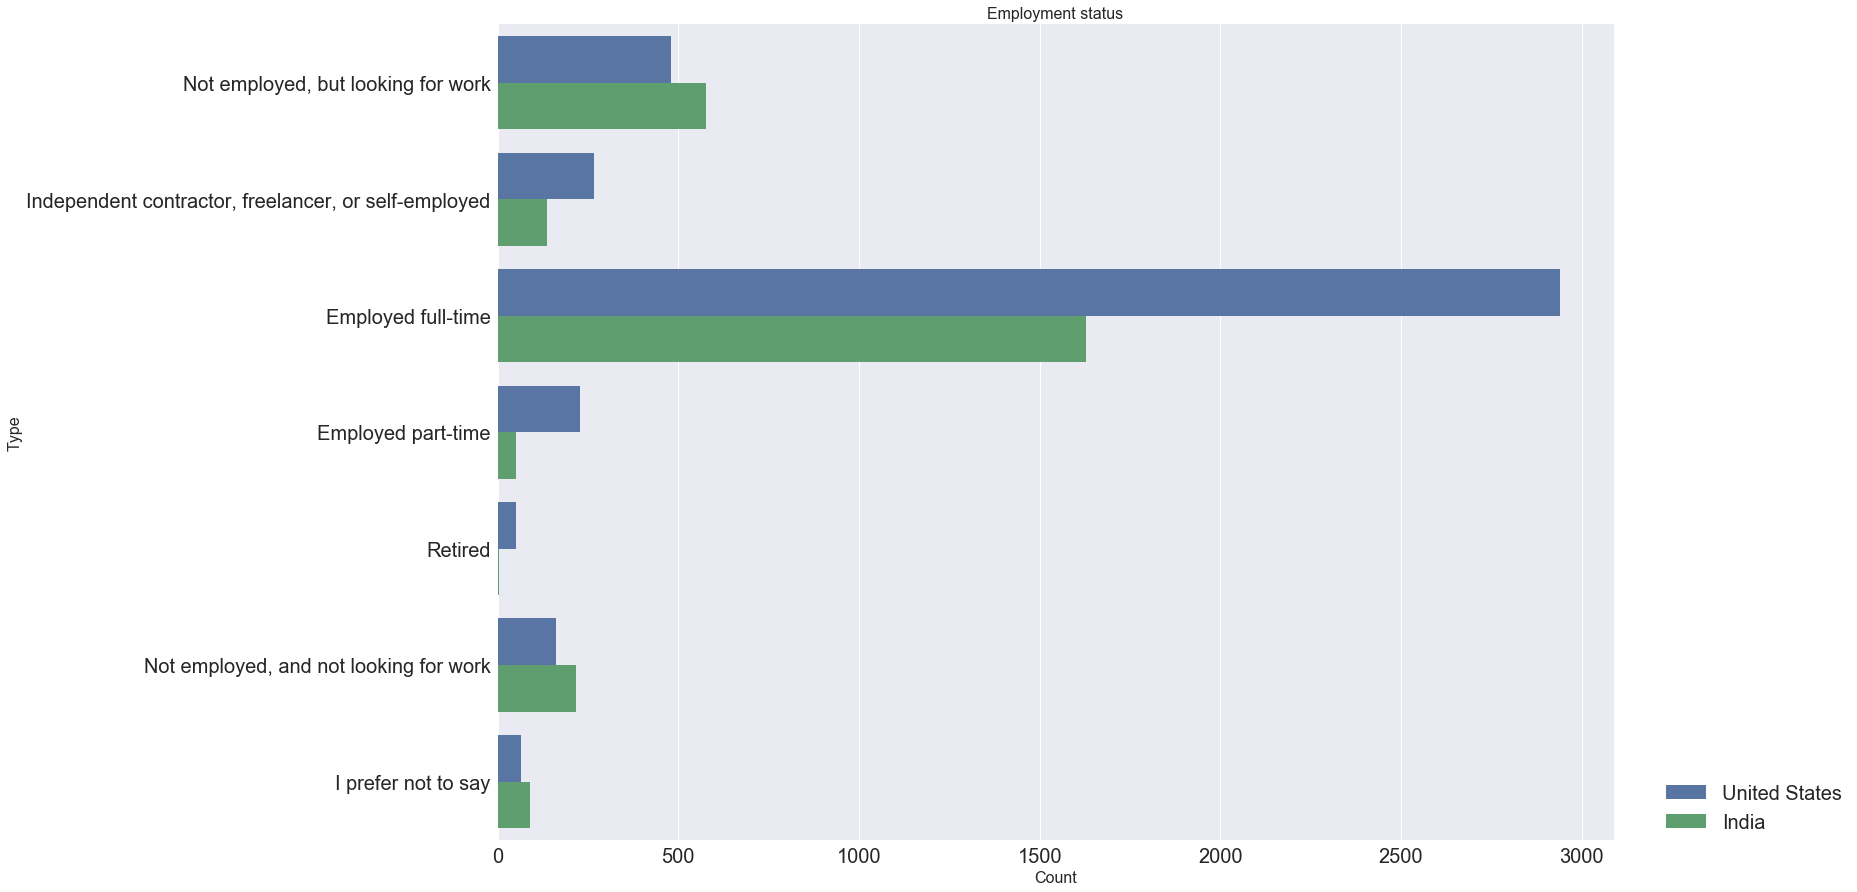

In [22]:
#Correlating countrywise data scientists data
emp_country = df[['Country', 'EmploymentStatus']]

# Get USA and India from the groups
emp_USA = emp_country.groupby('Country').get_group('United States')
emp_India = emp_country.groupby('Country').get_group('India')
emp_country = pd.concat([emp_USA, emp_India]).reset_index(drop=True)
del emp_USA, emp_India

# Count and plot 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(y=emp_country['EmploymentStatus'],orient='h', data=emp_country, hue='Country')
plt.title('Employment status', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Type', fontsize=16)
plt.legend(loc=(1.04,0))
plt.show()

In [23]:
#Getting numerics from emolyment status
df['DataScienceIdentitySelect'].value_counts()

No                        5314
Yes                       4257
Sort of (Explain more)    3100
Name: DataScienceIdentitySelect, dtype: int64

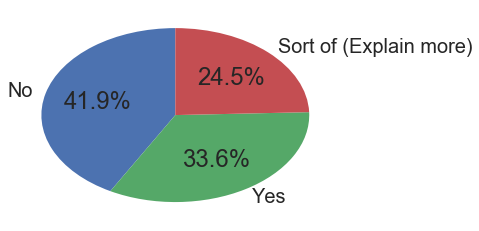

In [24]:
import matplotlib.pyplot as plt
switch = df['DataScienceIdentitySelect'].value_counts()
labels = (np.array(switch.index))
values = (np.array((switch / switch.sum())*100))
plt.pie(values, labels=labels,startangle=90, autopct='%.1f%%')
plt.show()

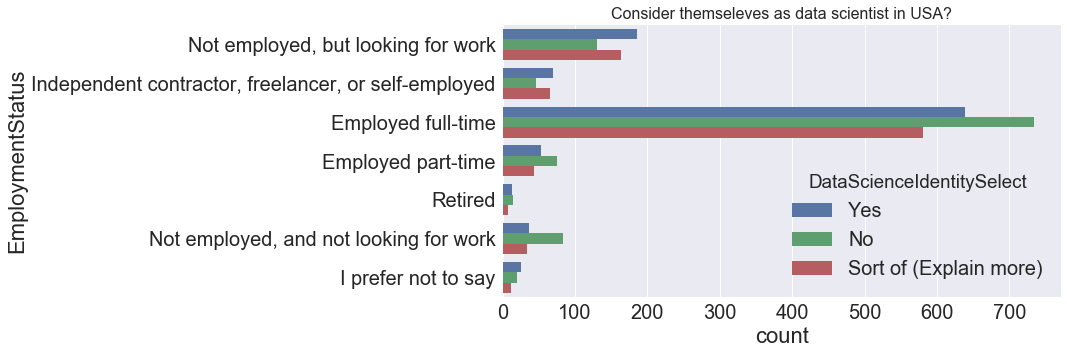

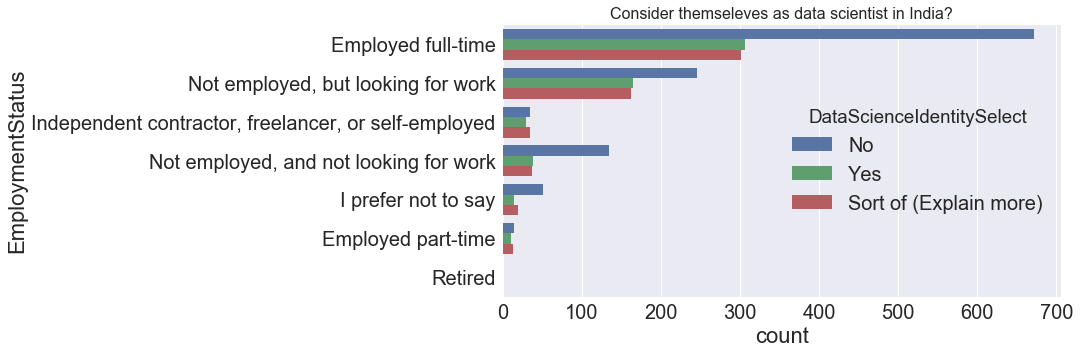

In [25]:
#Correlating countrywise people who identify theemselves as Data Scientists while also comparing their employment status
ds_country = df[['Country','EmploymentStatus','DataScienceIdentitySelect']].dropna()

# Groupby country and get India and US
ds_country_US = ds_country.groupby('Country').get_group('United States').reset_index(drop=True)
ds_country_India = ds_country.groupby('Country').get_group('India').reset_index(drop=True)

plt.figure(figsize=(10,5))
sns.countplot(y=ds_country_US['EmploymentStatus'], data=ds_country_US, hue='DataScienceIdentitySelect')
plt.title("Consider themseleves as data scientist in USA?", fontsize=16)
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y=ds_country_India['EmploymentStatus'], data=ds_country_India, hue='DataScienceIdentitySelect')
plt.title("Consider themseleves as data scientist in India?", fontsize=16)
plt.show()

In [26]:
#Time spent by various Data Scientists in different parts of problem while tackling the issue
tool = df.loc[:, 'TimeGatheringData':'TimeOtherSelect']
tool.columns

Index(['TimeGatheringData', 'TimeModelBuilding', 'TimeProduction',
       'TimeVisualizing', 'TimeFindingInsights', 'TimeOtherSelect'],
      dtype='object')

In [27]:
tool_cols = ['TimeGatheringData', 'TimeModelBuilding', 'TimeProduction',
       'TimeVisualizing', 'TimeFindingInsights', 'TimeOtherSelect']

In [28]:
tool.columns = tool_cols

In [29]:
tool.head()

,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect
0,0.0,100.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,50.0,20.0,0.0,10.0,20.0,0.0
4,30.0,20.0,15.0,15.0,20.0,0.0


C:\Users\shubham\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


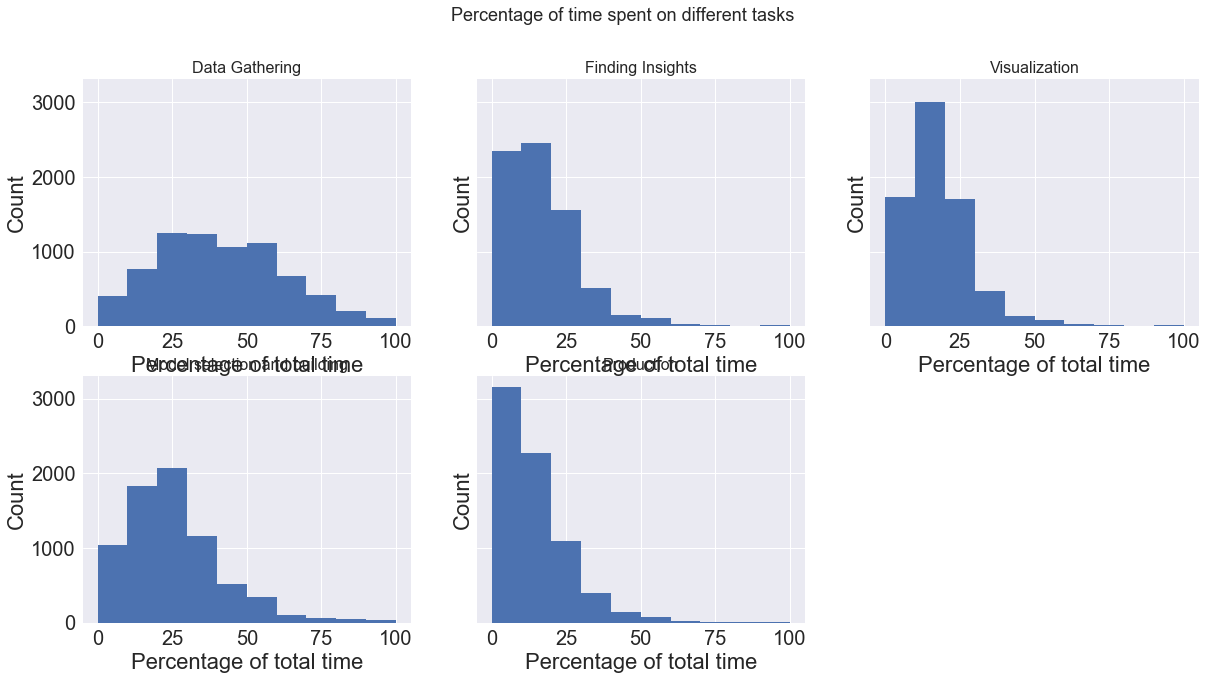

In [30]:
# Get all the relevant columns
df = df[['TimeGatheringData', 'TimeFindingInsights', 'TimeVisualizing','TimeModelBuilding', 'TimeProduction']]

# Drop the null values
df = df.dropna().reset_index(drop=True)

# Take the sum and remove all those rows where sum is greater than 100
df['total_time'] = df.sum(axis=1)
df = df.drop(df.index[((df.total_time > 100.0) | (df.total_time==0.0))], axis=0).reset_index(drop=True)
df = df.drop(df['total_time'], axis=0)


category = ['TimeGatheringData', 'TimeFindingInsights', 'TimeVisualizing','TimeModelBuilding', 'TimeProduction']
names =['Data Gathering', 'Finding Insights', 'Visualization', 'Model selection and building', 'Production']

f,axs = plt.subplots(2,3, figsize=(20,10), sharey=True)
for i, catg in enumerate(category):
    axs[i//3, i%3].hist(df[catg],bins=10,normed=0)
    axs[i//3, i%3].set_title(names[i], fontsize=16)
    axs[i//3, i%3].set_xlabel('Percentage of total time')
    axs[i//3, i%3].set_ylabel('Count')

f.delaxes(axs[1][2])
f.suptitle("Percentage of time spent on different tasks", fontsize=18)
plt.show()

In [31]:
df = pd.read_csv('multipleChoiceResponses.csv',encoding='latin-1')

C:\Users\shubham\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
#Focus of the people learning Data Science
df['LearningDataScience'].value_counts()

Yes, I'm focused on learning mostly data science skills                  800
Yes, but data science is a small part of what I'm focused on learning    429
No, I am not focused on learning data science skills                      55
Name: LearningDataScience, dtype: int64

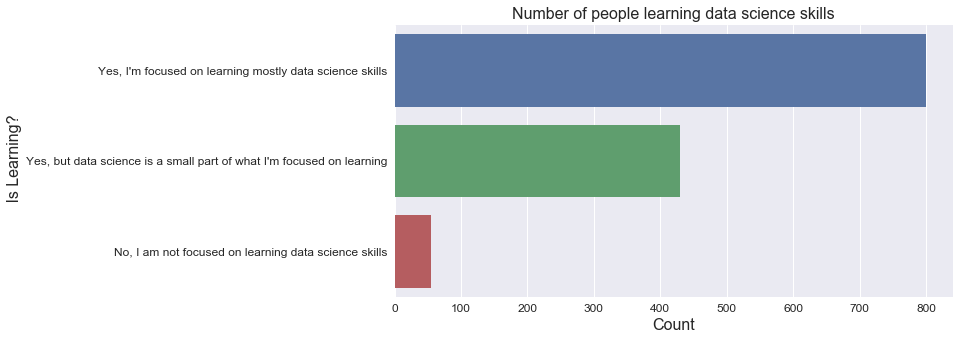

In [33]:
# How many are learning Data Sciece?
learning = df['LearningDataScience'].dropna()
learning_count = learning.value_counts()
plt.figure(figsize=(10,5))
sns.set(font_scale=1.2)
sns.barplot(x=learning_count.values, y=learning_count.index, orient='h')
plt.title("Number of people learning data science skills", fontsize=16)
plt.xlabel("Count", fontsize=16)
plt.ylabel(" Is Learning?", fontsize=16)
plt.show()

[]

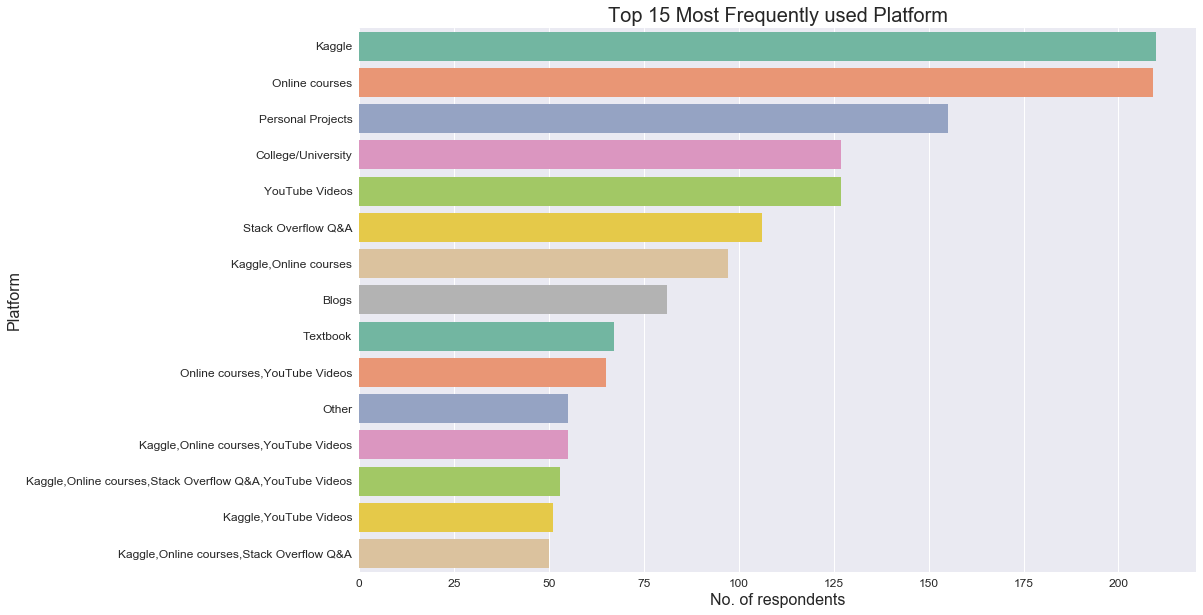

In [34]:
#Finding out top 15 most popular platforms among Data Scientists
plt.figure(figsize=(15,10))
platform=df['LearningPlatformSelect'].value_counts()[:15]
sns.barplot(y=platform.index,x=platform,palette='Set2')
plt.xlabel("No. of respondents",size=16)
plt.ylabel("Platform",size=16)
plt.title("Top 15 Most Frequently used Platform",size=20)
plt.plot()

In [35]:
#Number  of people using various popular ML Skiils
df['MLSkillsSelect'].value_counts()

Supervised Machine Learning (Tabular Data)                                                                                                                                                                                                                 1608
Supervised Machine Learning (Tabular Data),Unsupervised Learning                                                                                                                                                                                            550
Time Series                                                                                                                                                                                                                                                 532
Other (please specify; separate by semi-colon)                                                                                                                                                                                          

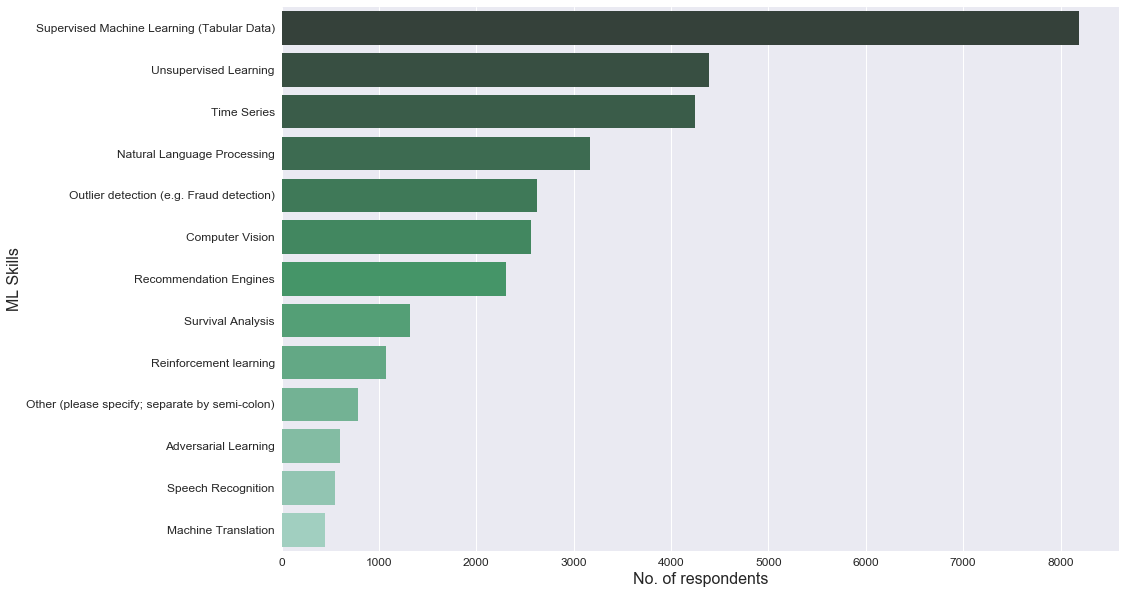

In [36]:
#Plot for ML Skills applied 
plt.figure(figsize=(15,10))
skills=df['MLSkillsSelect'].str.split(',')
skills_set=[]
for i in skills.dropna():
    skills_set.extend(i)
plt1=pd.Series(skills_set).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,palette='BuGn_d')
plt.xlabel('No. of respondents',size=16)
plt.ylabel('ML Skills',size=16)
plt.show()

In [37]:
#Learning LearningDataScienceTime usefulness 
df['LearningDataScienceTime'].value_counts()

< 1 year       2093
1-2 years      1566
3-5 years       540
5-10 years      106
15+ years        30
10-15 years      14
Name: LearningDataScienceTime, dtype: int64

[]

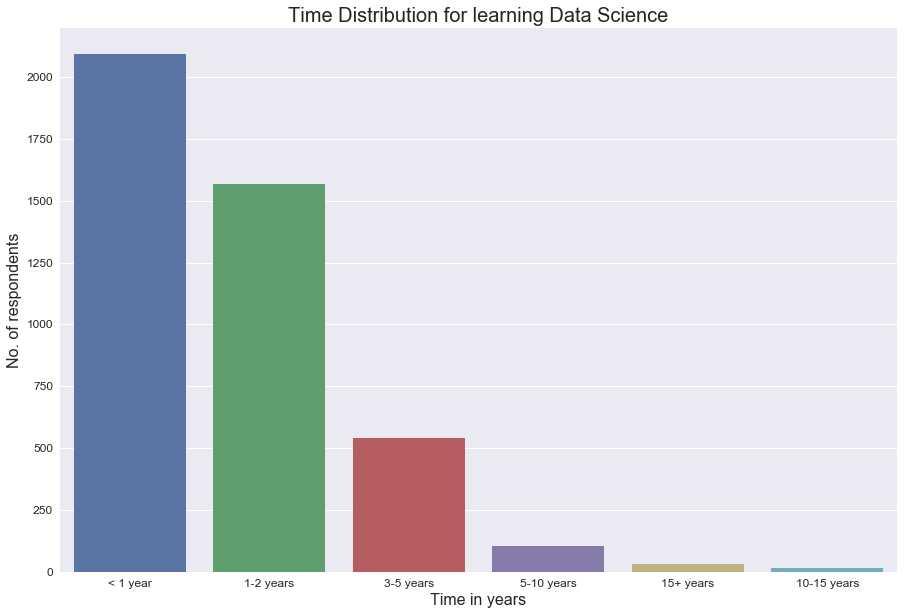

In [38]:
plt.figure(figsize=(15,10))
time=df['LearningDataScienceTime'].value_counts()
sns.barplot(time.index,time)
plt.xlabel("Time in years",size=16)
plt.ylabel("No. of respondents",size=16)
plt.title("Time Distribution for learning Data Science",size=20)
plt.plot()

In [39]:
#Job Satisfaction of candidates in various fields of Data Science
df['JobSatisfaction'].value_counts()

7                          1448
8                          1427
6                           765
9                           677
5                           627
10 - Highly Satisfied       589
3                           358
4                           354
1 - Highly Dissatisfied     167
I prefer not to share       148
2                           117
Name: JobSatisfaction, dtype: int64

[]

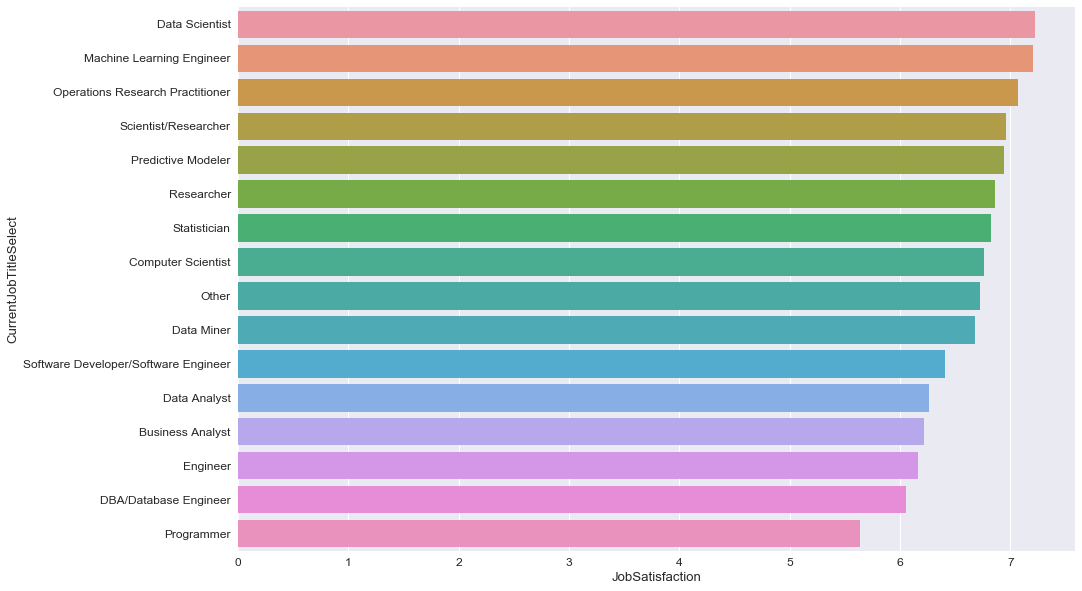

In [40]:
plt.figure(figsize=(15,10))
js=df.copy()
js['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'1','I prefer not to share':np.NaN},inplace=True)
js.dropna(subset=['JobSatisfaction'],inplace=True)
js['JobSatisfaction']=js['JobSatisfaction'].astype(int)
js=js.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean().sort_values(ascending=False).to_frame()
sns.barplot(js.JobSatisfaction,js.index)
plt.plot()

In [41]:
#Number of people using different languages
df['LanguageRecommendationSelect'].value_counts()

Python      6941
R           2643
SQL          385
C/C++/C#     307
Matlab       238
Java         138
Scala         94
SAS           88
Other         85
Julia         30
Stata         28
Haskell       17
F#             4
Name: LanguageRecommendationSelect, dtype: int64

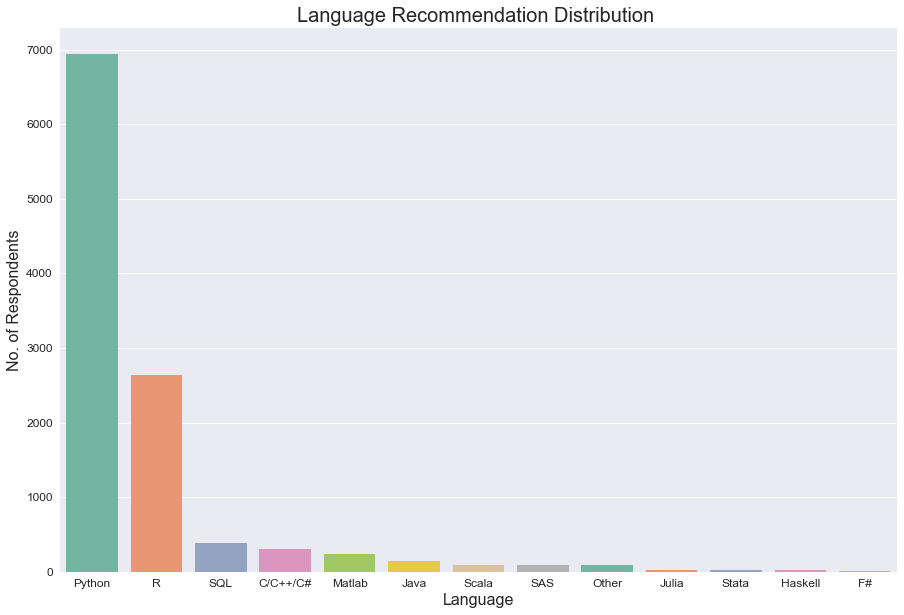

In [42]:
plt.figure(figsize=(15,10))
recomm=df['LanguageRecommendationSelect'].dropna().value_counts()
sns.barplot(recomm.index,recomm,palette='Set2')
plt.xlabel('Language',size=16)
plt.ylabel('No. of Respondents',size=16)
plt.title("Language Recommendation Distribution ",size=20)
plt.show()

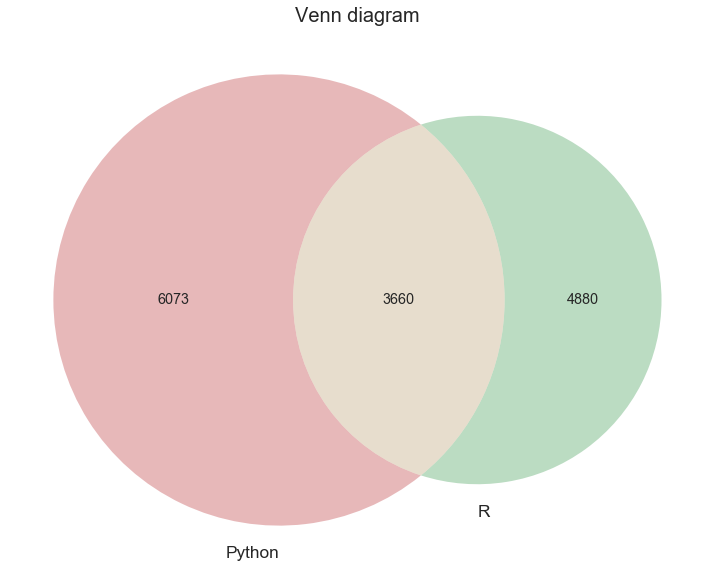

In [43]:
#Comparing Python v/s R users
lang=df['WorkToolsSelect'].dropna().to_frame()
lang1={'Python':len(lang[lang.WorkToolsSelect.str.contains('Python')]),'R':len(lang[lang.WorkToolsSelect.str.contains('R')]),'Both':len(lang[lang.WorkToolsSelect.str.contains('Python')&lang.WorkToolsSelect.str.contains('R')])}
plt.figure(figsize=(15,10))
from matplotlib_venn import venn2, venn2_circles

v = venn2(subsets=(2,1,1))
v.get_label_by_id('10').set_text(lang1['Python'])
v.get_label_by_id('01').set_text(lang1['R'])
v.get_label_by_id('11').set_text(lang1['Both'])
plt.title("Venn diagram",size=20)
v.get_label_by_id('A').set_text('Python')
v.get_label_by_id('B').set_text('R')
plt.show()

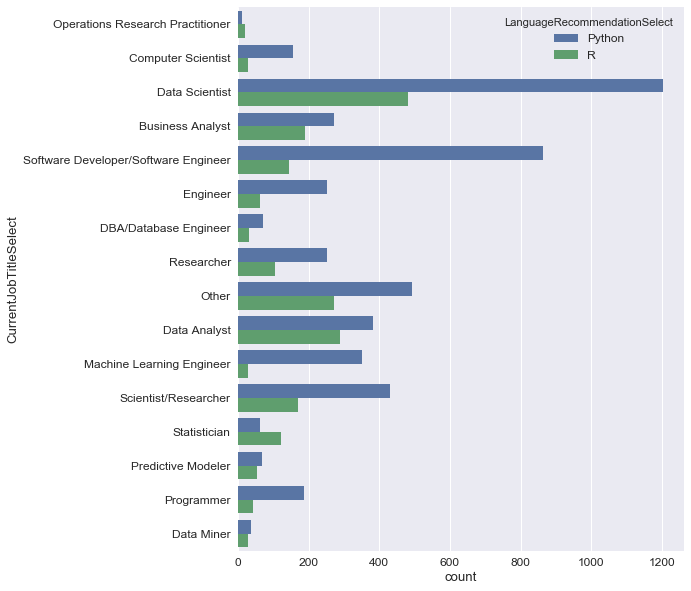

In [44]:
#Languages exercised by professionals of various domains
d = df[(df['CurrentJobTitleSelect'].notnull())&((df['LanguageRecommendationSelect']=='Python')
                                                 | (df['LanguageRecommendationSelect']=='R'))]
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect', data=d)

In [45]:
#Almost every profession prefer to use Python as a language except statistician. As they prefer to use R

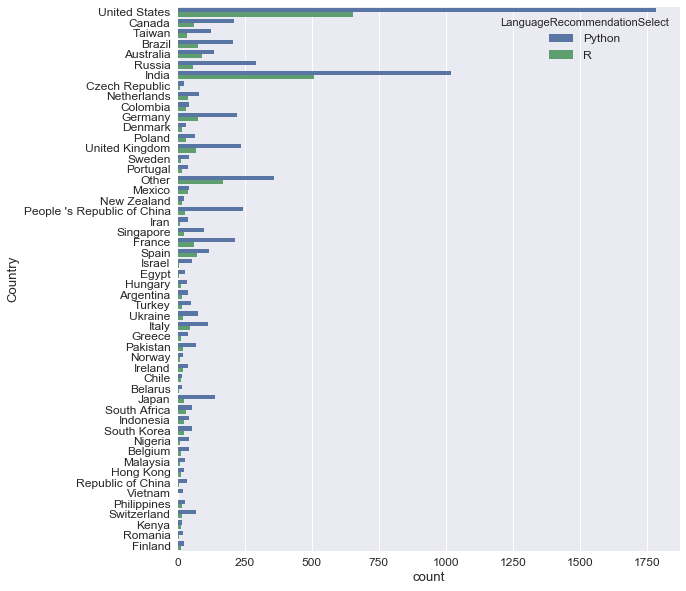

In [46]:
#CountryWise language popularity
x = df[df['Country'].notnull() & ((df['LanguageRecommendationSelect']=='Python')
                               | (df['LanguageRecommendationSelect']=='R'))]
plt.figure(figsize=(9,10))
sns.countplot(y='Country', hue='LanguageRecommendationSelect', data=x)

In [47]:
#Python is still dominating in almost all countries

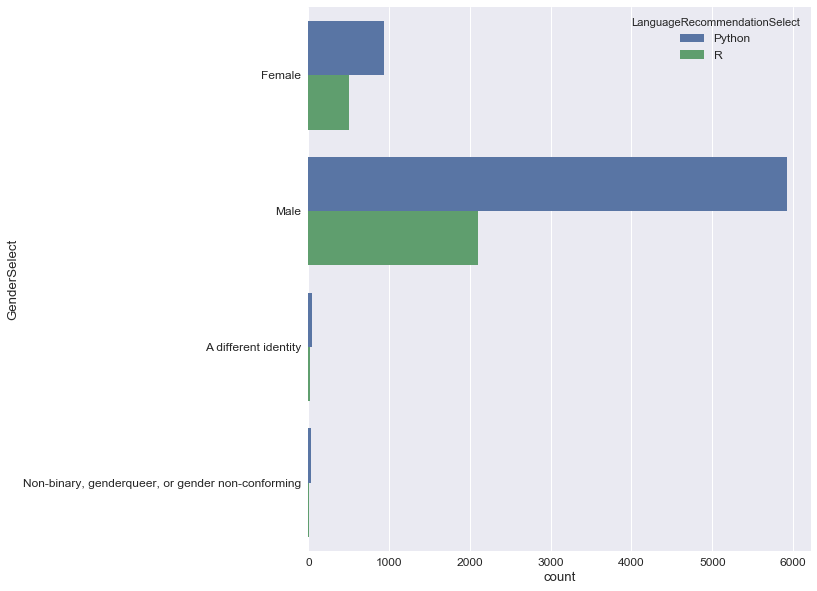

In [48]:
#Genderwise Disribution of Languages
x = df[df['GenderSelect'].notnull() & ((df['LanguageRecommendationSelect']=='Python')
                               | (df['LanguageRecommendationSelect']=='R'))]
plt.figure(figsize=(9,10))
sns.countplot(y='GenderSelect', hue='LanguageRecommendationSelect', data=x)

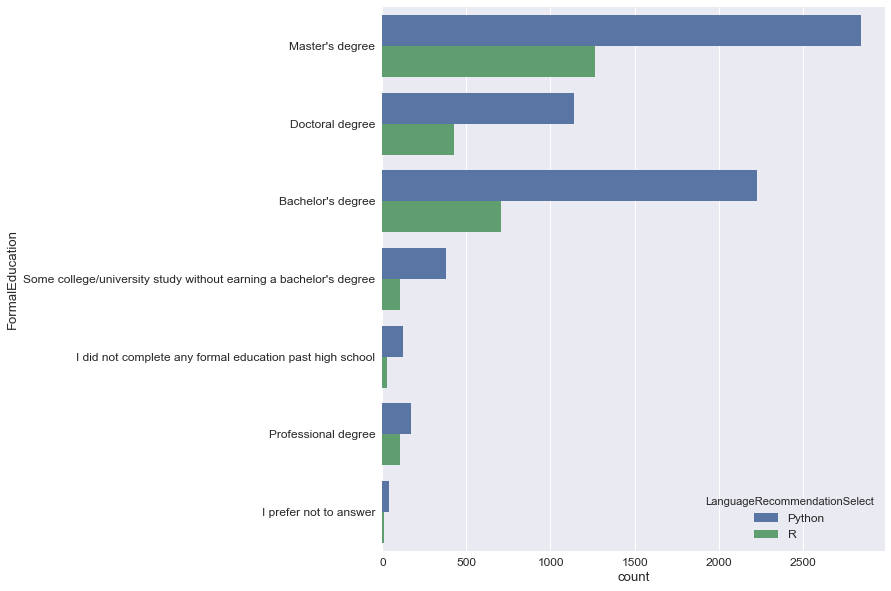

In [49]:
#Language preferred by people of various eduational accomplishments
x = df[df['FormalEducation'].notnull() & ((df['LanguageRecommendationSelect']=='Python')
                               | (df['LanguageRecommendationSelect']=='R'))]
plt.figure(figsize=(9,10))
sns.countplot(y='FormalEducation', hue='LanguageRecommendationSelect', data=x)

[]

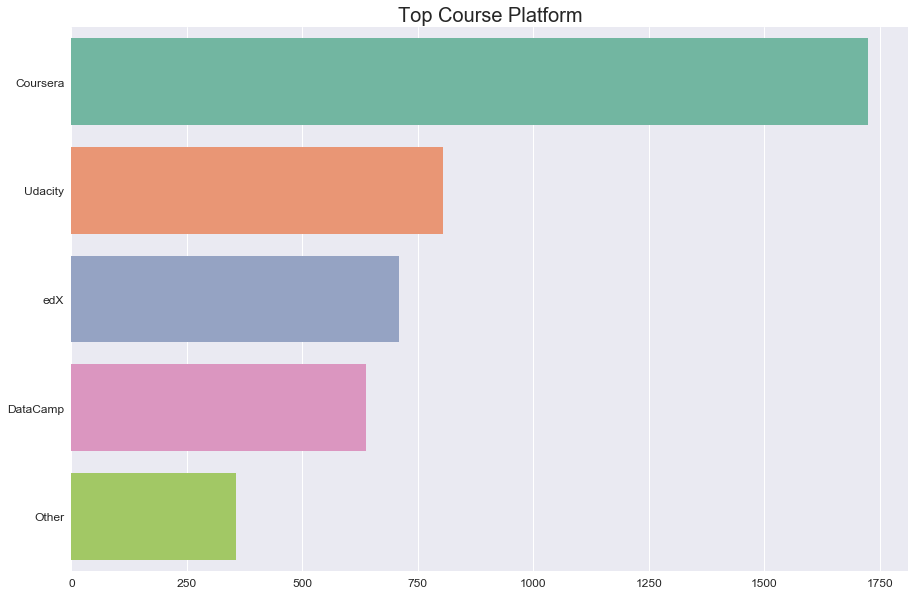

In [50]:
#Top Course Platforms used by data scientists
plt.figure(figsize=(15,10))
ws=df['CoursePlatformSelect'].dropna().apply(lambda x: pd.value_counts(x.split(","))).sum(axis = 0).sort_values(ascending=False)[:10]
sns.barplot(ws,ws.index,palette='Set2')
plt.title('Top Course Platform',size=20)
plt.plot()

[]

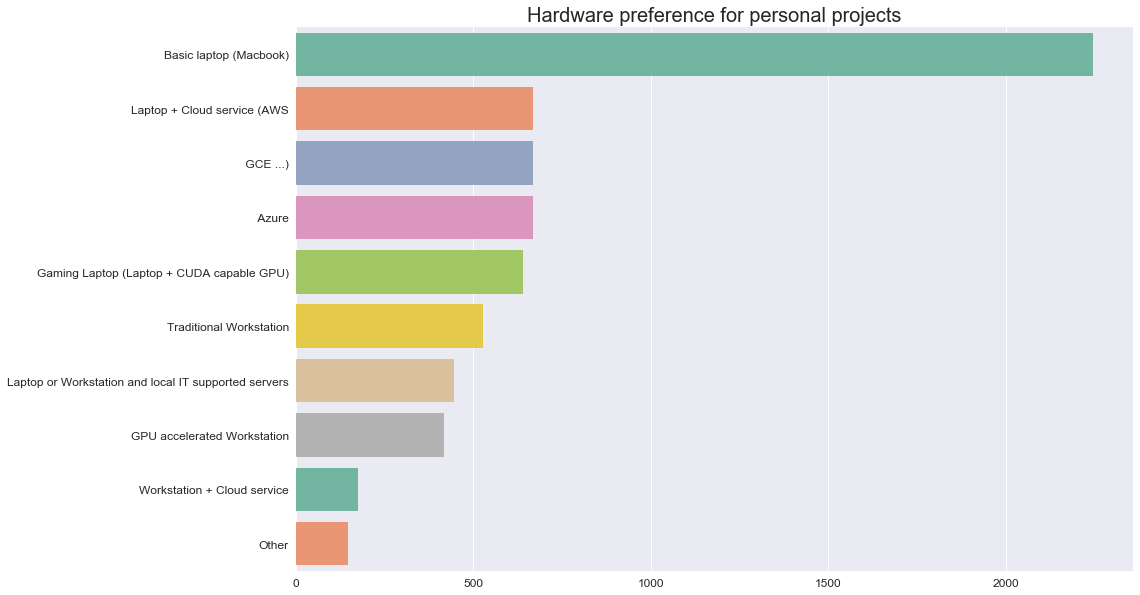

In [51]:
#Hardware preferences of Data Scientists
plt.figure(figsize=(15,10))
ws=df['HardwarePersonalProjectsSelect'].dropna().apply(lambda x: pd.value_counts(x.split(","))).sum(axis = 0).sort_values(ascending=False)[:10]
sns.barplot(ws,ws.index,palette='Set2')
plt.title('Hardware preference for personal projects',size=20)
plt.plot()

[]

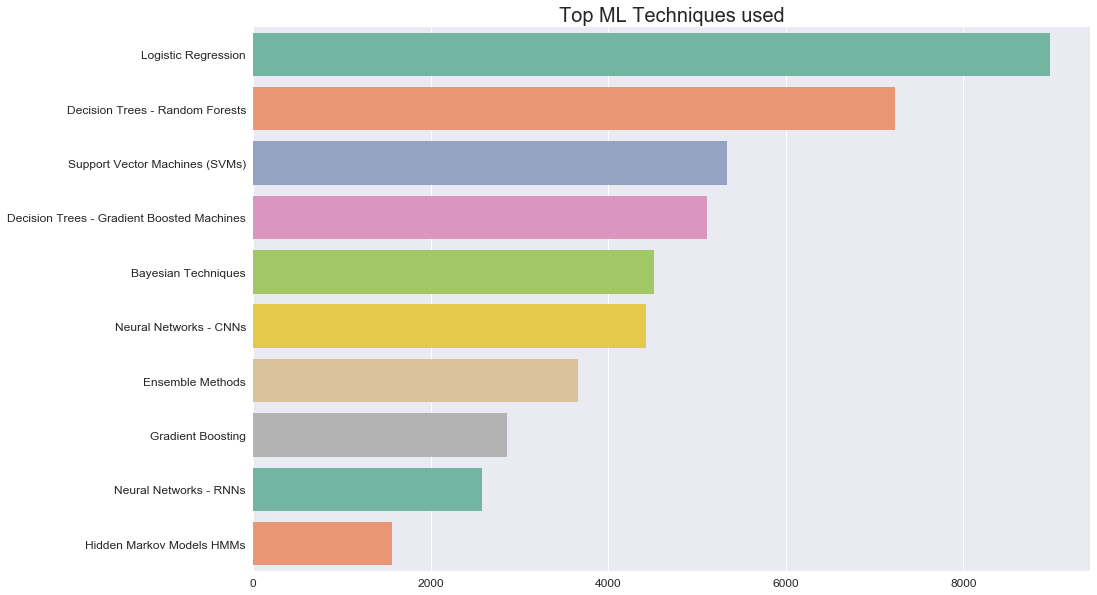

In [52]:
#Favourite ML Techniques of data science enthusiasts
plt.figure(figsize=(15,10))
ws=df['MLTechniquesSelect'].dropna().apply(lambda x: pd.value_counts(x.split(","))).sum(axis = 0).sort_values(ascending=False)[:10]
sns.barplot(ws,ws.index,palette='Set2')
plt.title('Top ML Techniques used',size=20)
plt.plot()

[]

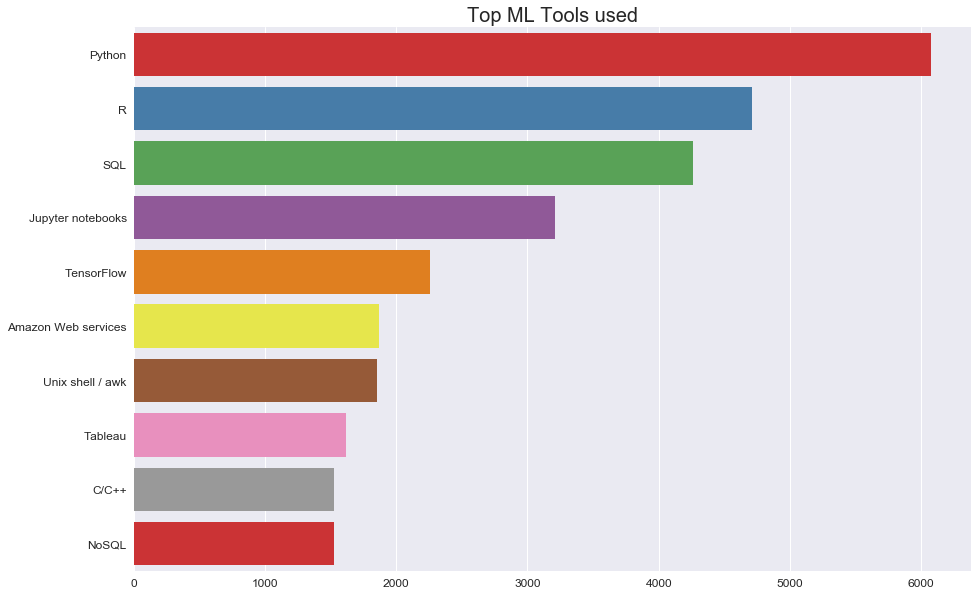

In [53]:
#Vastly used ML tools
plt.figure(figsize=(15,10))
ws=df['WorkToolsSelect'].dropna().apply(lambda x: pd.value_counts(x.split(","))).sum(axis = 0).sort_values(ascending=False)[:10]
sns.barplot(ws,ws.index,palette='Set1')
plt.title('Top ML Tools used',size=20)
plt.plot()


[]

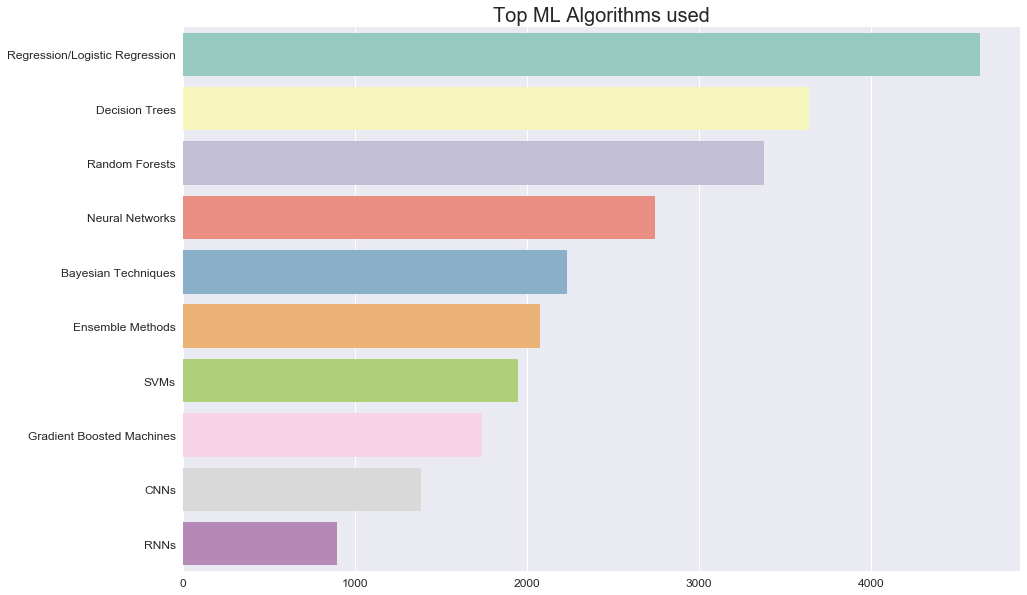

In [54]:
#Top ML algos deployed
plt.figure(figsize=(15,10))
ws=df['WorkAlgorithmsSelect'].dropna().apply(lambda x: pd.value_counts(x.split(","))).sum(axis = 0).sort_values(ascending=False)[:10]
sns.barplot(ws,ws.index,palette='Set3')
plt.title('Top ML Algorithms used',size=20)
plt.plot()

[]

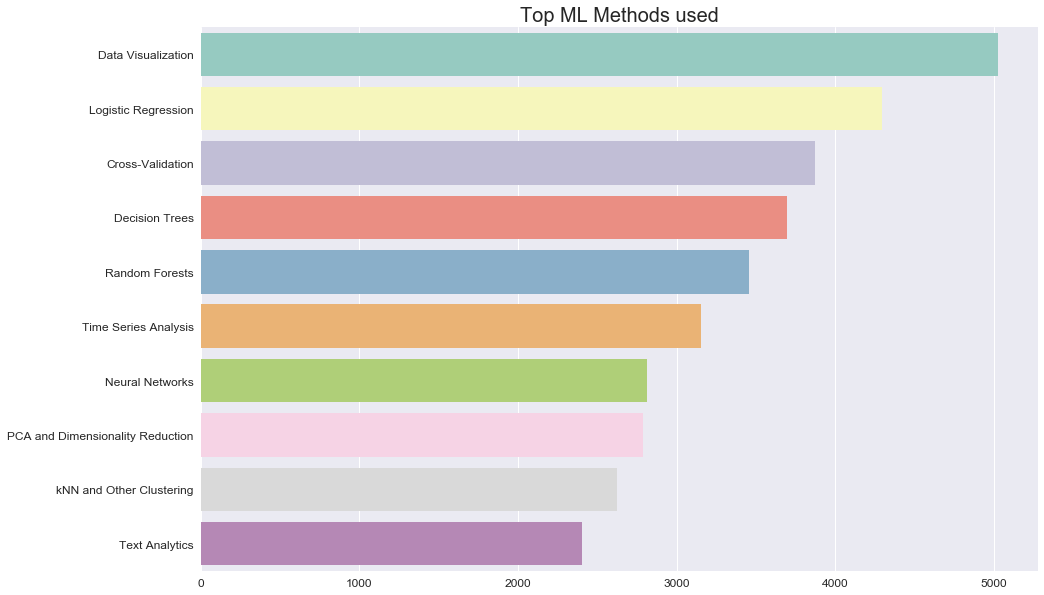

In [55]:
#Best ML practices among community
plt.figure(figsize=(15,10))
ws=df['WorkMethodsSelect'].dropna().apply(lambda x: pd.value_counts(x.split(","))).sum(axis = 0).sort_values(ascending=False)[:10]
sns.barplot(ws,ws.index,palette='Set3')
plt.title('Top ML Methods used',size=20)
plt.plot()

[]

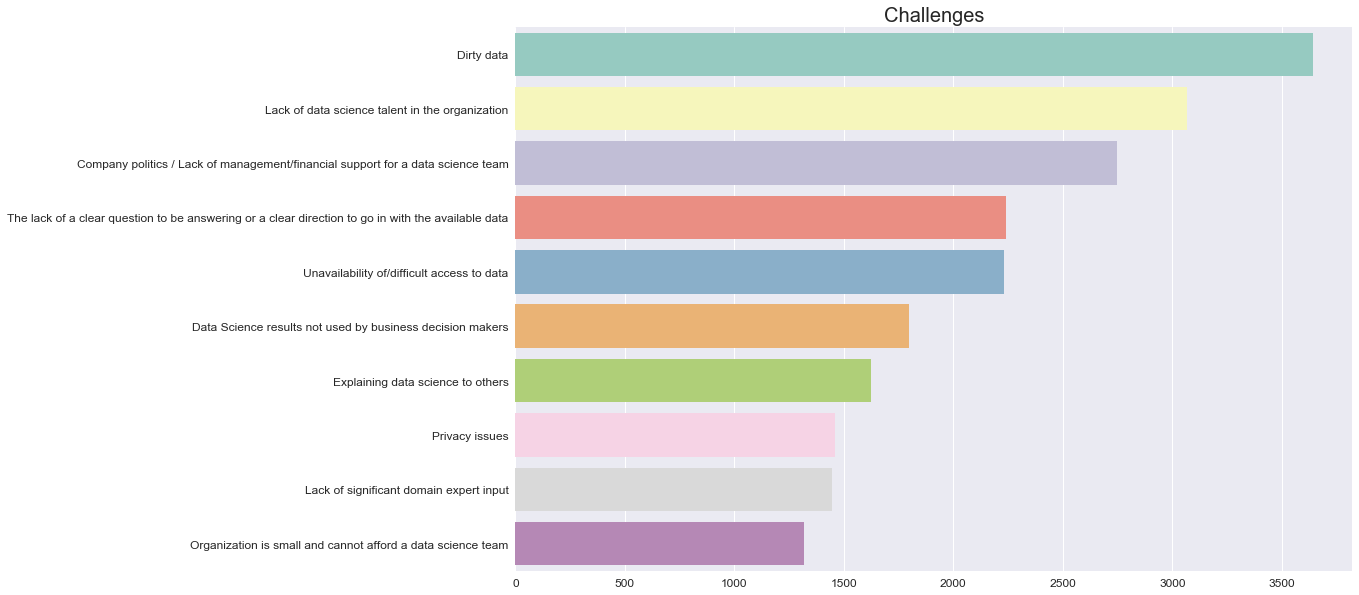

In [56]:
#Common Challenges Data scientists encounter
plt.figure(figsize=(15,10))
ws=df['WorkChallengesSelect'].dropna().apply(lambda x: pd.value_counts(x.split(","))).sum(axis = 0).sort_values(ascending=False)[:10]
sns.barplot(ws,ws.index,palette='Set3')
plt.title('Challenges',size=20)
plt.plot()